#Import Data

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

file_path_true = "data/WELFake_Dataset.csv"
# file_path_true = "/Users/atyantjain/Downloads/WELFake_Dataset.csv"
# file_path_true = "/content/drive/My Drive/WELFake_Dataset.csv"

In [4]:
import pandas as pd

df = pd.read_csv(file_path_true)
df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA‚ÄôS ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

#Data preprocessing

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
#Drop the missing value
df.dropna(subset=['title', 'text'], inplace=True)

In [7]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Combine title and text, and convert to lowercase
df['combined_text'] = (df['title'] + " " + df['text']).str.lower()

df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2           2  UNBELIEVABLE! OBAMA‚ÄôS ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                       combined_text  
0  law enforcement on high alert following threat...  
2  unbelievable! obama‚Äôs attorney general says mo...  
3  bobby jindal, raised hindu, uses story of chri...  
4  satan 2: russia unvelis an image of its terrif...  
5  about time! christian group sues amazon and sp...

In [9]:
df = df[df['label'].apply(lambda x: str(x).isdigit())]
df['label'].astype(int)
df['label'] = 1 - df['label']

#Feature Engineering

##Titel and Text length

In [10]:
# Create new features
df['title_len'] = df['title'].astype(str).apply(len)
df['text_len'] = df['text'].astype(str).apply(len)

# Preview the result
print(df[['title', 'title_len', 'text_len']].head())

                                               title  title_len  text_len
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...        130      5049
2  UNBELIEVABLE! OBAMA‚ÄôS ATTORNEY GENERAL SAYS MO...        137       216
3  Bobby Jindal, raised Hindu, uses story of Chri...        105      8010
4  SATAN 2: Russia unvelis an image of its terrif...         95      1916
5  About Time! Christian Group Sues Amazon and SP...         78      1530


In [11]:
df["text_len"].describe()

count     71537.000000
mean       3292.722116
std        3738.194002
min           1.000000
25%        1410.000000
50%        2440.000000
75%        4077.000000
max      142961.000000
Name: text_len, dtype: float64

##Combined text length

In [12]:
df['combined_text_len'] = df['combined_text'].astype(str).apply(len)

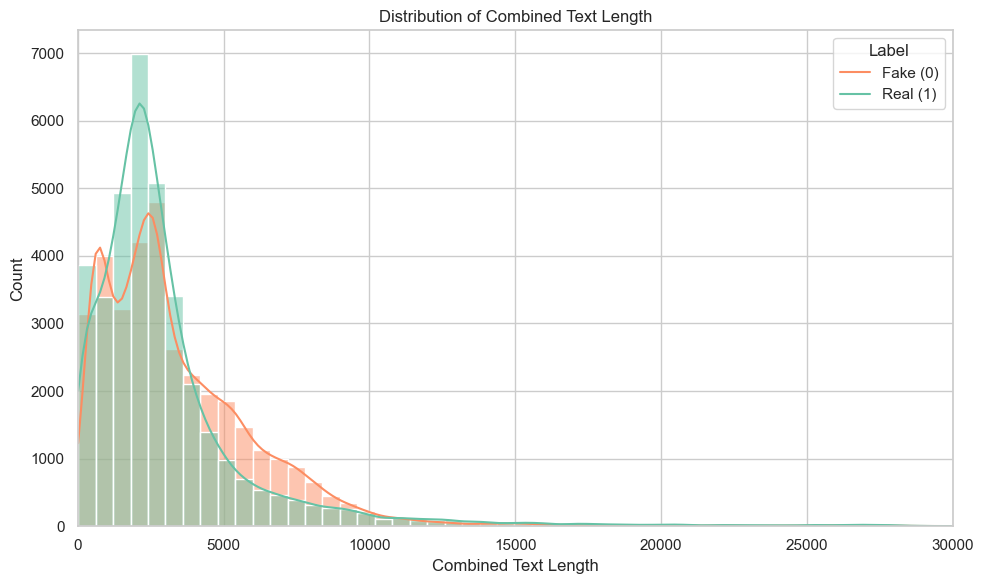

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['combined_text_len'] < 30000],
             x='combined_text_len',
             hue='label',
             bins=50,
             kde=True,
             palette='Set2')

plt.title('Distribution of Combined Text Length')
plt.xlabel('Combined Text Length')
plt.xlim(0, 30000)
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])
plt.tight_layout()
plt.show()

### üìä Feature: `combined_text_length`

**Interpretation**:  
The distribution shows that real news articles (Label 1) tend to have slightly **longer combined text lengths** than fake news articles (Label 0). Both distributions are right-skewed, but the real news peaks around 3000‚Äì4000 characters, while fake news has a flatter distribution with more short-length articles.

**Recommendation**: ‚úÖ **Keep this feature**  
Text length is a useful auxiliary signal. It can help distinguish fake from real articles, especially in models like RoBERTa when used as an additional input alongside embeddings. You could also use it for filtering or padding strategies if fine-tuning.

> üîß Optional: You could consider **bucketing or normalizing** this feature before adding it to your model, or even use it to filter outliers.

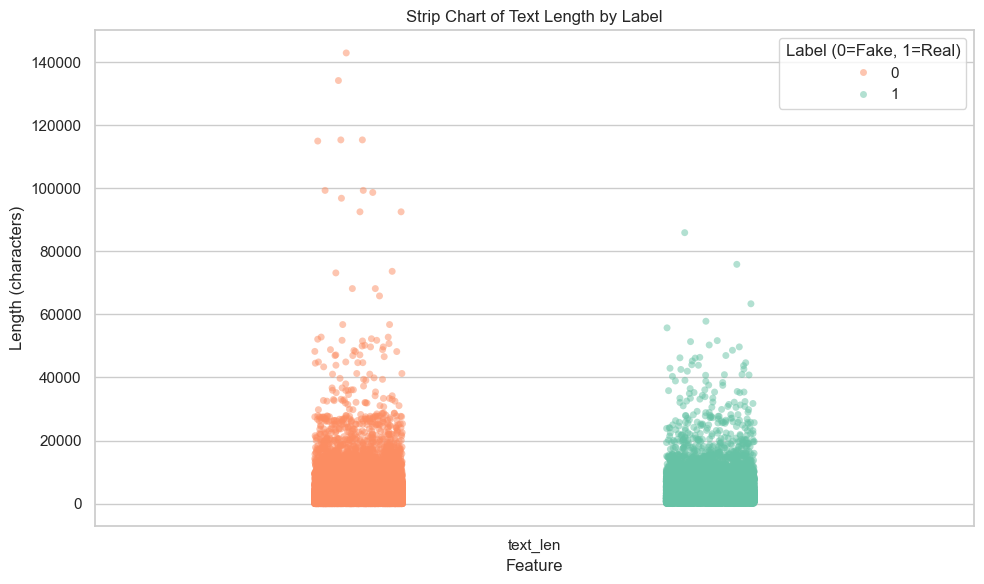

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape including label
length_df = df[['label', 'text_len']].melt(id_vars='label', var_name='Feature', value_name='Length')

# Plot as strip chart with swapped colors
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=length_df,
    x='Feature',
    y='Length',
    hue='label',
    palette={0: '#FC8D62', 1: '#66C2A5'},  # Swapped colors
    dodge=True,
    jitter=True,
    alpha=0.5
)
plt.title('Strip Chart of Text Length by Label')
plt.xlabel('Feature')
plt.ylabel('Length (characters)')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

### üìä Feature: `text_len` (Length of Text by Label)

**Interpretation**:  
This strip chart shows that **fake news articles (Label 0)** tend to have more outliers and a wider spread in text length, including many **very long articles (above 100,000 characters)**. In contrast, **real news articles (Label 1)** have a more compact and consistent range, with fewer extreme values.

This suggests that fake news may include long-winded or bloated narratives, while real news maintains a more standard editorial length.

**Recommendation**: ‚úÖ **Keep this feature**  
Text length clearly differentiates the two classes in terms of distribution and outliers. For RoBERTa, although it uses tokenized input, this feature can serve as a **supplemental input or filtering criterion** (e.g., remove extremely long articles that exceed token limits).

> üîß Optional: You might also experiment with trimming or capping extremely long texts to the RoBERTa max token limit (e.g., 512 or 1024).

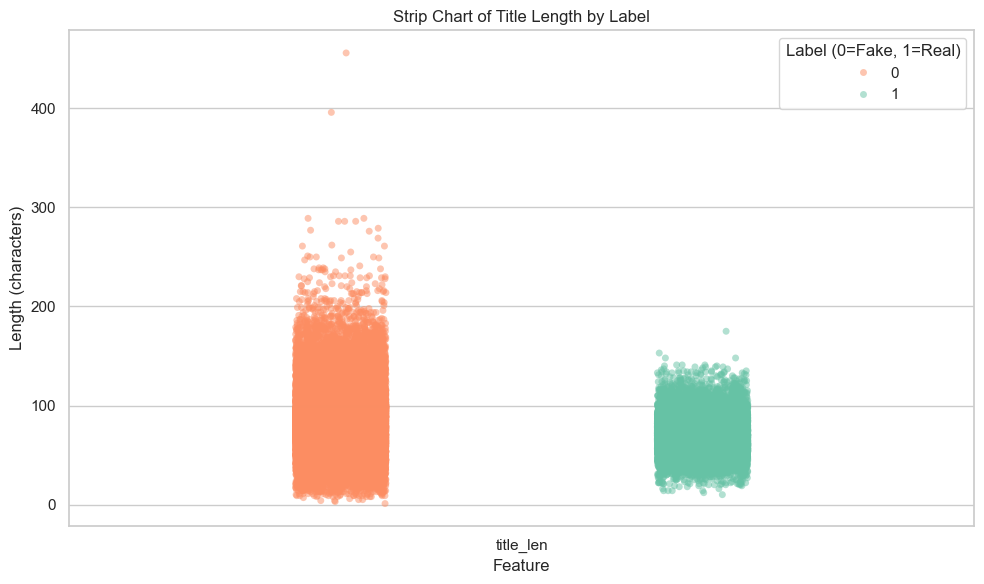

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape including label
length_df = df[['label', 'title_len']].melt(id_vars='label', var_name='Feature', value_name='Length')

custom_palette = {0: sns.color_palette("Set2")[1], 1: sns.color_palette("Set2")[0]}

# Plot as strip chart with swapped colors
plt.figure(figsize=(10, 6))
sns.stripplot(data=length_df, x='Feature', y='Length', hue='label', palette=custom_palette, dodge=True, jitter=True, alpha=0.5)
plt.title('Strip Chart of Title Length by Label')
plt.xlabel('Feature')
plt.ylabel('Length (characters)')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

### üìä Feature: `title_len` (Title Length by Label)

**Interpretation**:  
The chart shows that **fake news titles (Label 0)** are generally longer, with several outliers exceeding 200 characters. In contrast, **real news titles (Label 1)** are more concise and fall within a narrower range, typically under 150 characters.

This suggests that fake news articles often use longer, more sensational headlines to attract clicks, while real news headlines are more direct and standardized.

**Recommendation**: ‚úÖ **Keep this feature**  
Title length is a strong stylistic indicator of news type and can enhance RoBERTa‚Äôs ability to detect patterns when combined with token embeddings. You can either:
- Use it as an **auxiliary numeric feature**, or
- Let RoBERTa implicitly capture this via token count, but it‚Äôs still valuable for interpretability and potential hybrid models.

> üõ†Ô∏è Tip: Normalize this feature if integrating it with RoBERTa outputs in a mixed (hybrid) architecture.

##Average word length

In [16]:
def avg_word_length(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    words = text.split()
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(words)

# Apply to your DataFrame
df['avg_word_len'] = df['combined_text'].apply(avg_word_length)


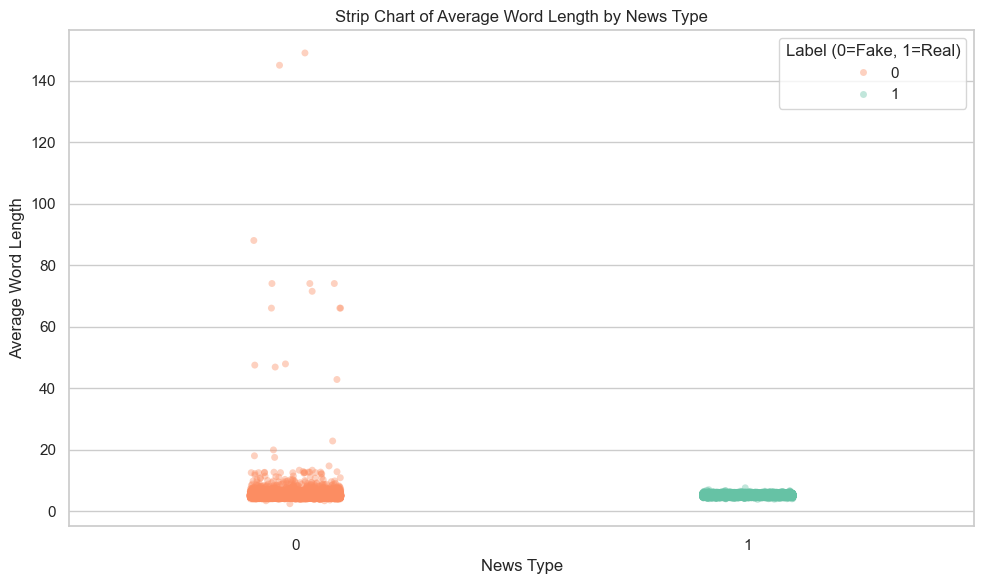

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot as strip chart
plt.figure(figsize=(10, 6))
sns.stripplot(x='label', y='avg_word_len', hue='label',data=df, jitter=True, alpha=0.4, palette=custom_palette)
plt.title('Strip Chart of Average Word Length by News Type')
plt.xlabel('News Type')
plt.ylabel('Average Word Length')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

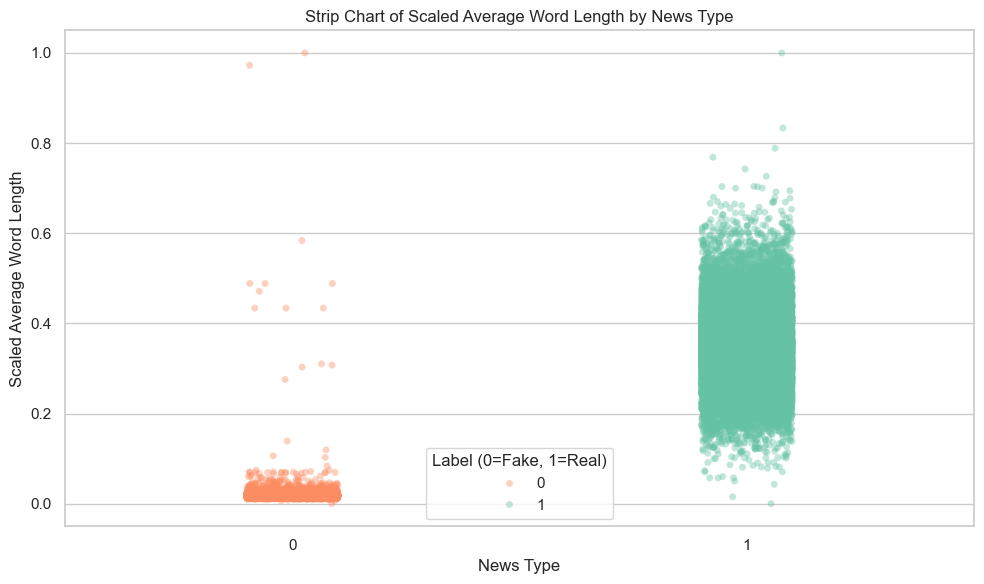

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set plot style
sns.set(style="whitegrid")

# Separate scaling for each label group
df_scaled = df.copy()
scaler = MinMaxScaler()

for label in df['label'].unique():
    mask = df['label'] == label
    df_scaled.loc[mask, 'scaled_avg_word_len'] = scaler.fit_transform(df.loc[mask, ['avg_word_len']])

# Strip plot with scaled values
plt.figure(figsize=(10, 6))
sns.stripplot(x='label', y='scaled_avg_word_len', hue='label',
              data=df_scaled, jitter=True, alpha=0.4, palette=custom_palette)

plt.title('Strip Chart of Scaled Average Word Length by News Type')
plt.xlabel('News Type')
plt.ylabel('Scaled Average Word Length')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

### üìä Feature: `scaled_avg_word_len` (Min-Max Scaled Average Word Length by News Type)

**Interpretation**:  
This strip chart shows a **distinct separation** in scaled average word length between fake (Label 0) and real news (Label 1). Fake news articles cluster around lower scaled values (closer to 0), while real news articles are distributed across a higher scaled range. This suggests that real news tends to use longer or more complex words, while fake news often relies on simpler language.

**Recommendation**: ‚úÖ **Keep this feature**  
Even though RoBERTa tokenizes input into subwords, this feature captures a **global linguistic pattern** that can enhance model interpretability or be used in a hybrid or ensemble setup. Min-Max scaling makes it ready for numeric input into neural layers or concatenation with embeddings.

> üõ†Ô∏è Good job using Min-Max scaling! You can directly concatenate this with other auxiliary features in a late-fusion architecture.

##Number of Exclamation mark and Question mark

<>:7: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\?'
/var/folders/td/v9rxhq955vb5h2pnnrwkc4f40000gn/T/ipykernel_45551/3678285681.py:7: SyntaxWarning: invalid escape sequence '\?'
  df['num_question'] = df['combined_text'].str.count('\?')


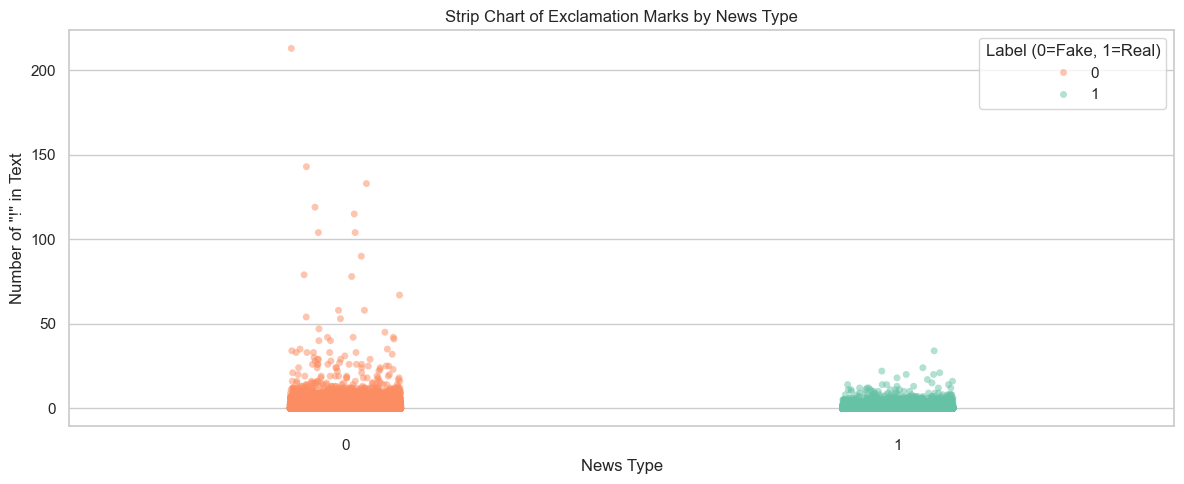

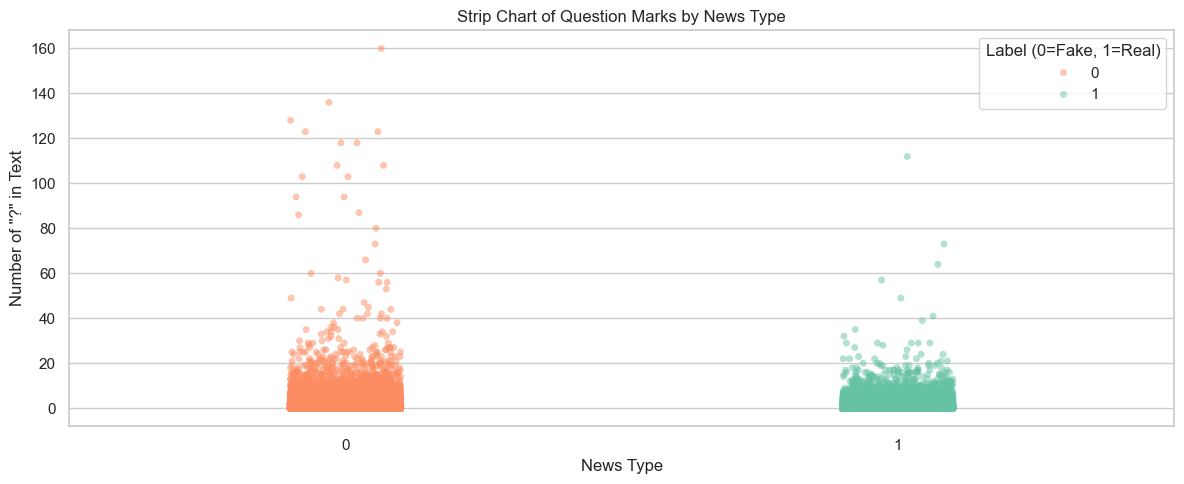

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create features
df['num_exclam'] = df['combined_text'].str.count('!')
df['num_question'] = df['combined_text'].str.count('\?')

# Set seaborn style
sns.set(style='whitegrid')

# Strip plot for exclamation marks
plt.figure(figsize=(12, 5))
sns.stripplot(x='label', y='num_exclam', hue='label', data=df, jitter=True, alpha=0.5,
              palette=custom_palette, dodge=False)
plt.title('Strip Chart of Exclamation Marks by News Type')
plt.xlabel('News Type')
plt.ylabel('Number of "!" in Text')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

# Strip plot for question marks
plt.figure(figsize=(12, 5))
sns.stripplot(x='label', y='num_question', hue='label', data=df, jitter=True, alpha=0.5,
              palette=custom_palette, dodge=False)
plt.title('Strip Chart of Question Marks by News Type')
plt.xlabel('News Type')
plt.ylabel('Number of "?" in Text')
plt.legend(title='Label (0=Fake, 1=Real)')
plt.tight_layout()
plt.show()

### üìä Feature: `exclamation_count` (Number of "!" in Text by News Type)

**Interpretation**:  
This strip chart shows that **fake news articles (Label 0)** contain significantly more exclamation marks than real news (Label 1). Many fake articles use 10‚Äì50 exclamation marks, with some extreme outliers exceeding 50. In contrast, real news rarely uses exclamation marks and is tightly clustered near zero.

This aligns with known fake news patterns, where exaggerated punctuation is used for sensationalism and emotional manipulation.

**Recommendation**: ‚úÖ **Keep this feature**  
The separation is **clear and meaningful**. Even though RoBERTa can model punctuation contextually, explicitly counting exclamations adds interpretability and can reinforce style-based signals in hybrid models.

> üß† Tip: You can also explore similar stylistic features like question marks, ellipses (`...`), or repeated punctuation for richer expressiveness.

### üìä Feature: `question_count` (Number of "?" in Text by News Type)

**Interpretation**:  
This strip chart shows that **fake news articles (Label 0)** tend to use significantly more question marks than real news (Label 1), often ranging from 10 to over 100 in extreme cases. Real news rarely exceeds 20 question marks and is more tightly distributed near zero.

This supports the idea that fake news frequently uses rhetorical or leading questions to provoke curiosity, doubt, or fear ‚Äî a common tactic in misinformation.

**Recommendation**: ‚úÖ **Keep this feature**  
The distinction is **clear and meaningful**. This stylistic marker adds value beyond RoBERTa‚Äôs token embeddings by highlighting tone and writing style. Especially useful for feature-rich or hybrid classification pipelines.

> üí¨ Optional: You can combine `question_count` and `exclamation_count` into a **"sensationalism_score"** to capture exaggerated punctuation patterns.

##Sentiment analysis

In [20]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [21]:
from textblob import TextBlob

# Function to compute sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    return pd.Series([blob.polarity, blob.subjectivity])

# Apply on title
df[['sentiment_title_polarity', 'sentiment_title_subjectivity']] = df['title'].apply(get_sentiment)

# Apply on text
df[['sentiment_text_polarity', 'sentiment_text_subjectivity']] = df['text'].apply(get_sentiment)

# Check result
print(df[['title', 'sentiment_title_polarity', 'sentiment_title_subjectivity']].head())


                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA‚ÄôS ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

   sentiment_title_polarity  sentiment_title_subjectivity  
0                  0.080000                      0.320000  
2                  0.121875                      0.625000  
3                  0.000000                      0.500000  
4                 -0.287879                      0.484848  
5                 -0.400000                      0.450000  


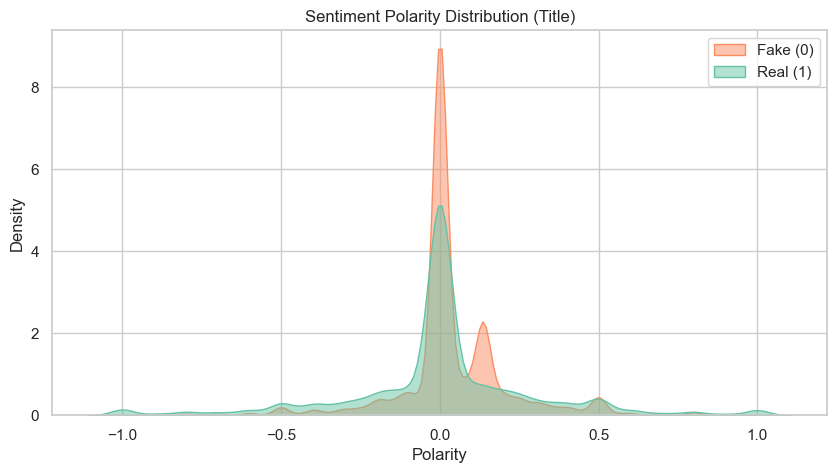

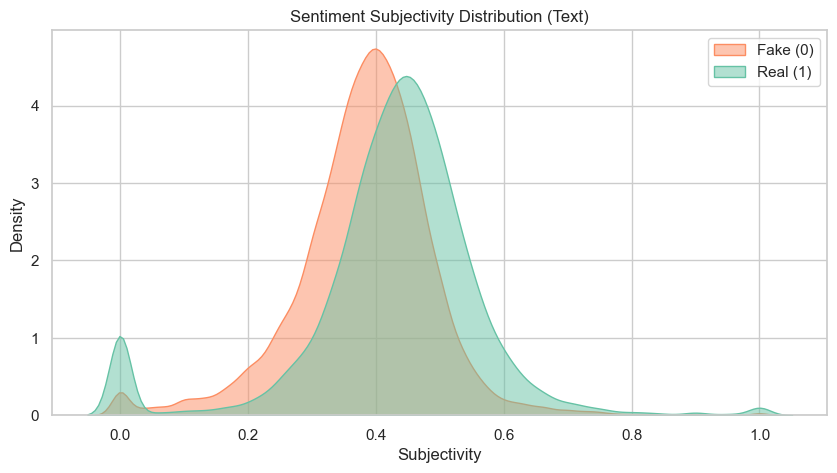

In [22]:
# Set style
sns.set(style="whitegrid")

# Plot 1: Polarity distribution for titles (by label)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='sentiment_title_polarity', hue='label', fill=True, common_norm=False, alpha=0.5, palette='Set2')
plt.title('Sentiment Polarity Distribution (Title)')
plt.xlabel('Polarity')
plt.legend(labels=["Fake (0)", "Real (1)"])
plt.show()

# Plot 2: Subjectivity distribution for text (by label)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='sentiment_text_subjectivity', hue='label', fill=True, common_norm=False, alpha=0.5, palette='Set2')
plt.title('Sentiment Subjectivity Distribution (Text)')
plt.xlabel('Subjectivity')
plt.legend(labels=["Fake (0)", "Real (1)"])
plt.show()

### üìä Feature: `title_sentiment_polarity` (Sentiment Polarity of News Titles)

**Interpretation**:  
This density plot shows that **fake news titles (Label 0)** are more sharply centered around **neutral polarity (0)**, but with a **distinct secondary bump on the positive side** (around 0.2‚Äì0.3). Real news (Label 1), while also mostly neutral, shows a **wider distribution** and more balanced spread across positive and negative values.

This suggests fake news often tries to appear neutral or slightly optimistic in tone, while real news captures a broader emotional spectrum.

**Recommendation**: ‚úÖ **Keep this feature**  
Even though the differences are subtle, sentiment polarity can help detect **tonal patterns** and **emotional framing** typical of fake headlines. When combined with other features (e.g., punctuation, question marks), it enhances overall model expressiveness.

> üìâ Tip: Consider adding **subjectivity score** as a complementary feature to assess bias or opinionated tone.

### üìä Feature: `text_subjectivity` (Sentiment Subjectivity of News Text)

**Interpretation**:  
This density plot reveals that **fake news articles (Label 0)** have a **higher concentration around a subjectivity score of ~0.4**, indicating a moderately opinionated tone. In contrast, **real news (Label 1)** shows a slightly **broader and more right-shifted distribution**, with a portion extending towards higher subjectivity (up to 1.0) and a **small spike at 0**, suggesting some objective reporting.

This implies that **fake news generally maintains a consistent level of subjectivity**, while **real news varies more**, ranging from factual reporting to opinionated editorials.

**Recommendation**: ‚úÖ **Keep this feature**  
Subjectivity is a valuable signal. It reflects **tone consistency** and helps differentiate **opinion-heavy misinformation** from **fact-based journalism**. RoBERTa might not explicitly capture this unless trained extensively on sentiment tasks, so including it as a structured feature can add complementary value.

> üí° Suggestion: You may also explore **combining polarity and subjectivity** into a joint feature (e.g., polarity √ó subjectivity) to emphasize emotionally biased language.

##Flesch and Gunning score


In [23]:
# !pip install textstat

In [24]:
# import textstat
# from tqdm import tqdm

# # If not already using tqdm for progress tracking
# tqdm.pandas()

# # Assuming your DataFrame is named df and contains 'text' and 'title' columns

# # Flesch Reading Ease: higher = easier to read
# df['text_flesch'] = df['text'].progress_apply(lambda x: textstat.flesch_reading_ease(str(x)))
# df['title_flesch'] = df['title'].progress_apply(lambda x: textstat.flesch_reading_ease(str(x)))

# # Gunning Fog Index: higher = more complex (aim for 7-8 for standard English)
# df['text_gunning'] = df['text'].progress_apply(lambda x: textstat.gunning_fog(str(x)))
# df['title_gunning'] = df['title'].progress_apply(lambda x: textstat.gunning_fog(str(x)))

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set Seaborn style
# sns.set(style="whitegrid")

# # Set figure size
# plt.figure(figsize=(14, 6))

# # 1. Flesch Reading Ease - Text
# plt.subplot(1, 2, 1)
# sns.kdeplot(data=df, x="text_flesch", hue="label", fill=True, common_norm=False, palette="Set2")
# plt.title("Flesch Reading Ease (Text)\nHigher = Easier to Read")
# plt.xlabel("Flesch Score")
# plt.ylabel("Density")
# plt.legend(title="Label", labels=["Fake", "Real"])
# plt.xlim(0, 100)  # Flesch is naturally between 0‚Äì100

# # 2. Gunning Fog Index - Text (LIMITED to 0‚Äì100)
# plt.subplot(1, 2, 2)
# sns.kdeplot(data=df[df["text_gunning"] <= 100], x="text_gunning", hue="label", fill=True, common_norm=False, palette="Set2")
# plt.title("Gunning Fog Index (Text)\nHigher = More Complex")
# plt.xlabel("Fog Index")
# plt.ylabel("Density")
# plt.legend(title="Label", labels=["Fake", "Real"])
# plt.xlim(0, 100)

# plt.tight_layout()
# plt.show()

In [26]:
# # 1. Flesch Reading Ease - title
# plt.subplot(1, 2, 1)
# sns.kdeplot(data=df, x="title_flesch", hue="label", fill=True, common_norm=False, palette="Set2")
# plt.title("Flesch Reading Ease (title)\nHigher = Easier to Read")
# plt.xlabel("Flesch Score")
# plt.ylabel("Density")
# plt.legend(title="Label", labels=["Fake", "Real"])
# plt.xlim(0, 100)  # Flesch is naturally between 0‚Äì100

# # 2. Gunning Fog Index - title (LIMITED to 0‚Äì100)
# plt.subplot(1, 2, 2)
# sns.kdeplot(data=df[df["title_gunning"] <= 100], x="title_gunning", hue="label", fill=True, common_norm=False, palette="Set2")
# plt.title("Gunning Fog Index (title)\nHigher = More Complex")
# plt.xlabel("Fog Index")
# plt.ylabel("Density")
# plt.legend(title="Label", labels=["Fake", "Real"])
# plt.xlim(0, 100)


##Lexical diversity

In [27]:
import pandas as pd

def lexical_diversity(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# Apply to your dataframe
df['lexical_diversity'] = df['combined_text'].apply(lexical_diversity)

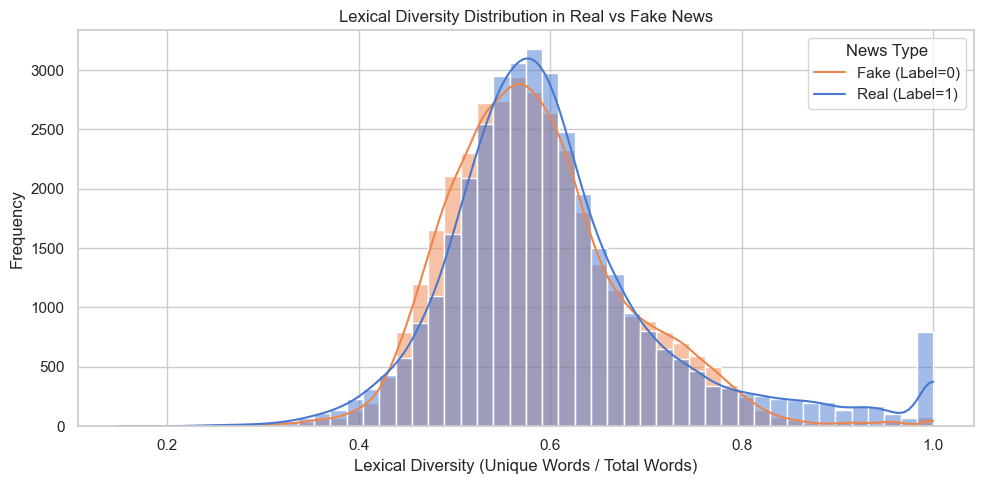

In [28]:
# Plot lexical diversity distribution by class
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lexical_diversity', hue='label', bins=50, kde=True, palette='muted')
plt.title('Lexical Diversity Distribution in Real vs Fake News')
plt.xlabel('Lexical Diversity (Unique Words / Total Words)')
plt.ylabel('Frequency')
plt.legend(title='News Type', labels=['Fake (Label=0)', 'Real (Label=1)'])
plt.tight_layout()
plt.show()

### üìä Feature: `lexical_diversity` (Unique Words / Total Words)

**Interpretation**:  
This plot shows that **real news articles (Label 1)** tend to have slightly **higher lexical diversity**, peaking around **0.58**, whereas **fake news (Label 0)** is centered closer to **0.55** with a longer tail toward lower diversity scores.

Lexical diversity measures how varied the vocabulary is. A higher score suggests richer, more varied language, while lower scores indicate more repetitive or generic word usage.

This pattern suggests that real news generally uses a **broader and more precise vocabulary**, while fake news might reuse more common terms, possibly to appeal to a general audience or due to automated generation.

**Recommendation**: ‚úÖ **Keep this feature**  
Lexical diversity is a strong stylistic indicator. It helps capture **content quality and linguistic variety**, which can complement RoBERTa's token-level features, especially in distinguishing nuanced vs. repetitive language patterns.

> üîç Note: You may want to investigate the **spike at 1.0** ‚Äî it could be due to very short texts where all words are unique (e.g., headlines or extremely short articles).

## Punctuation ratio and Stopword ratio

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


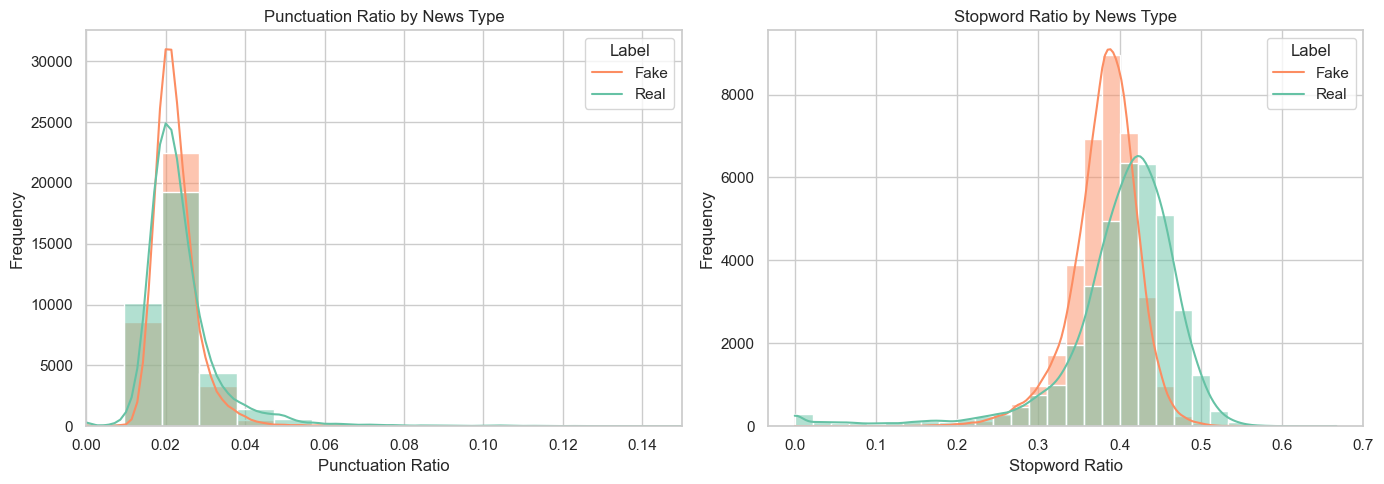

In [29]:
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define feature functions
def punctuation_ratio(text):
    if not isinstance(text, str) or len(text) == 0:
        return 0
    punct_count = sum(1 for char in text if char in string.punctuation)
    return punct_count / len(text)

def stopword_ratio(text):
    if not isinstance(text, str) or len(text.split()) == 0:
        return 0
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count / len(words)

# Apply feature functions
df['punctuation_ratio'] = df['combined_text'].apply(punctuation_ratio)
df['stopword_ratio'] = df['combined_text'].apply(stopword_ratio)

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


# Plot punctuation_ratio comparison (adjust x-axis range)
sns.histplot(data=df, x='punctuation_ratio', hue='label', bins=30, kde=True, ax=axes[0], palette='Set2')
axes[0].set_title('Punctuation Ratio by News Type')
axes[0].set_xlabel('Punctuation Ratio')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 0.15)
axes[0].legend(title='Label', labels=['Fake', 'Real'])

# Plot stopword_ratio comparison
sns.histplot(data=df, x='stopword_ratio', hue='label', bins=30, kde=True, ax=axes[1], palette='Set2')
axes[1].set_title('Stopword Ratio by News Type')
axes[1].set_xlabel('Stopword Ratio')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Label', labels=['Fake', 'Real'])

# Final layout
plt.tight_layout()
plt.show()

### üìä Feature: `stopword_ratio` (Stopwords / Total Words)

**Interpretation**:  
The plot shows that **fake news (Label 0)** peaks at a **slightly lower stopword ratio** (~0.38), whereas **real news (Label 1)** tends to have a **higher stopword ratio**, peaking closer to **0.42**.

Stopwords are function words (e.g., *the, is, at*) that don't carry much meaning on their own but help with sentence structure. A higher ratio may reflect **more formal and grammatically complete writing**, which is often seen in professional journalism. A lower ratio might indicate **simpler, less structured, or more keyword-focused language**, common in fake news.

**Recommendation**: ‚úÖ **Keep this feature**  
Stopword ratio captures subtle **linguistic style differences** that RoBERTa might not explicitly learn without fine-tuning on stylistic cues. It's useful in hybrid or feature-augmented models to reflect **fluency and writing style**.

> üîç You could also combine this with features like `punctuation_ratio` and `avg_word_length` to model general **writing sophistication**.

/var/folders/td/v9rxhq955vb5h2pnnrwkc4f40000gn/T/ipykernel_45551/2440047438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='label', y='punctuation_ratio', data=df, jitter=True, alpha=0.5, ax=axes[0], palette='Set2')
/var/folders/td/v9rxhq955vb5h2pnnrwkc4f40000gn/T/ipykernel_45551/2440047438.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='label', y='stopword_ratio', data=df, jitter=True, alpha=0.5, ax=axes[1], palette='Set2')


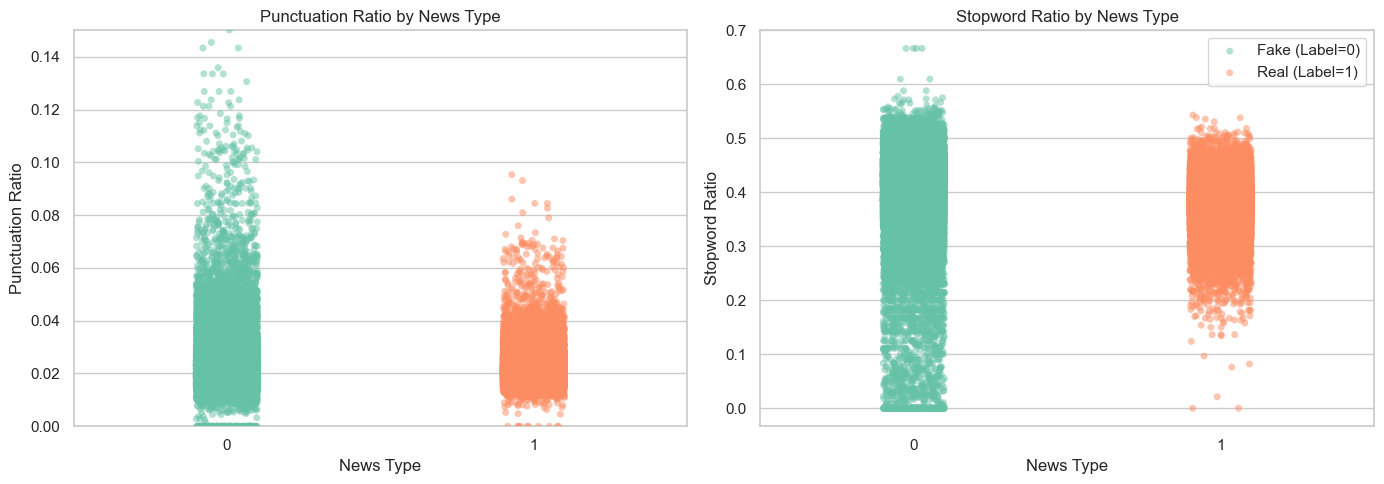

In [30]:
# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Punctuation ratio stripplot
sns.stripplot(x='label', y='punctuation_ratio', data=df, jitter=True, alpha=0.5, ax=axes[0], palette='Set2')
axes[0].set_title('Punctuation Ratio by News Type')
axes[0].set_xlabel('News Type')
axes[0].set_ylabel('Punctuation Ratio')
plt.legend(labels=['Fake (Label=0)', 'Real (Label=1)'])
axes[0].set_ylim(0, 0.15)

# Stopword ratio stripplot
sns.stripplot(x='label', y='stopword_ratio', data=df, jitter=True, alpha=0.5, ax=axes[1], palette='Set2')
axes[1].set_title('Stopword Ratio by News Type')
axes[1].set_xlabel('News Type')
axes[1].set_ylabel('Stopword Ratio')
plt.legend(labels=['Fake (Label=0)', 'Real (Label=1)'])

# Final layout
plt.tight_layout()
plt.show()

### üìä Feature: `punctuation_ratio` (Punctuation Characters / Total Characters)

**Interpretation**:  
This plot shows that **real news (Label 1)** has a **lower punctuation ratio**, while **fake news (Label 0)** often has a **higher concentration of punctuation**, reaching up to 0.14. Fake articles appear to use punctuation more frequently, possibly for **dramatic or emotional effect** (e.g., excessive commas, ellipses, exclamation marks).

This supports the idea that fake news may rely on **emotive punctuation** to capture attention, whereas real news typically follows more formal editorial guidelines.

**Recommendation**: ‚úÖ **Keep this feature**  
Punctuation ratio is a valuable stylistic signal that helps distinguish **emotional manipulation** vs. **objective reporting**. Even though RoBERTa learns contextual usage of tokens, this global ratio adds interpretability and can be used in ensemble or feature-augmented pipelines.

> ‚úçÔ∏è Tip: Combine with features like `exclamation_count` or `question_count` for a broader measure of **expressive writing style**.

# Modeling

### Justification for Choosing Three Models

We selected Logistic Regression, Random Forest, and XGBoost for the following reasons:

1. Logistic Regression:
    - Provides a strong, interpretable linear baseline for text classification.
    - Useful for understanding feature importance and the effect of engineered features.
    - Fast to train and easy to regularize, making it robust to overfitting on high-dimensional TF-IDF data.

2. Random Forest:
    - Captures non-linear relationships and feature interactions that linear models may miss.
    - Handles both numeric and sparse features well, and is robust to outliers and noise.
    - Provides feature importance scores, aiding interpretability.

3. XGBoost:
    - State-of-the-art gradient boosting algorithm, often achieving top performance on structured/tabular data.
    - Handles high-dimensional, sparse data efficiently and includes built-in regularization.
    - Offers advanced control over model complexity and is highly scalable for large datasets.

By comparing these three models, we balance interpretability, non-linear modeling capacity, and state-of-the-art predictive power, ensuring a comprehensive evaluation of our feature set and dataset.


In [31]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
stop_words = set(stopwords.words('english'))

# Add custom stopwords
additional_stopwords = {'reuters'}  # Add any words you want
stop_words.update(additional_stopwords)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['combined_text'].apply(preprocess_text)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Normalize numeric features
features_to_scale = [
    'avg_word_len', 'num_exclam', 'num_question',
    'sentiment_title_polarity', 'sentiment_title_subjectivity',
    'sentiment_text_polarity', 'sentiment_text_subjectivity',
    'lexical_diversity', 'punctuation_ratio', 'stopword_ratio'
]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df[features_to_scale])

# Combine TF-IDF and numeric features
from scipy.sparse import hstack
X_combined = hstack([X_tfidf, X_numeric_scaled])

# Labels
y = df['label']  # Adjust column name if needed

# Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("üìä Logistic Regression:\n", classification_report(y_test, logreg.predict(X_test)))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.toarray(), y_train)
print("üå≥ Random Forest:\n", classification_report(y_test, rf.predict(X_test.toarray())))

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train.toarray(), y_train)
print("‚ö° XGBoost:\n", classification_report(y_test, xgb.predict(X_test.toarray())))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavghaisas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


üìä Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7227
           1       0.92      0.92      0.92      7081

    accuracy                           0.92     14308
   macro avg       0.92      0.92      0.92     14308
weighted avg       0.92      0.92      0.92     14308

üå≥ Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7227
           1       0.96      0.94      0.95      7081

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:57:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


‚ö° XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      7227
           1       0.97      0.96      0.96      7081

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



>**Interpretaion**: The comparative evaluation of three supervised models‚ÄîLogistic Regression, Random Forest, and XGBoost‚Äîdemonstrates a consistent upward trend in classification performance as model complexity increases. Logistic Regression, serving as a strong linear baseline, achieved a solid accuracy of 92%, highlighting the predictive strength of well-engineered features such as TF-IDF vectors and stylistic attributes. Random Forest improved on this by leveraging ensemble learning, capturing non-linear feature interactions and achieving 95% accuracy with balanced precision and recall.

>XGBoost, however, emerged as the most effective model, attaining an outstanding accuracy of 96% and an F1-score of 0.96 for both fake and real news classes. Its performance validates the importance of gradient-boosted decision trees in handling complex patterns‚Äîparticularly in nuanced linguistic tasks such as misinformation detection.

In [32]:
# Save the models
import joblib
joblib.dump(logreg, 'models/logistic_regression_model.pkl')
joblib.dump(rf, 'models/random_forest_model.pkl')
joblib.dump(xgb, 'models/xgboost_model.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

## Visualisations


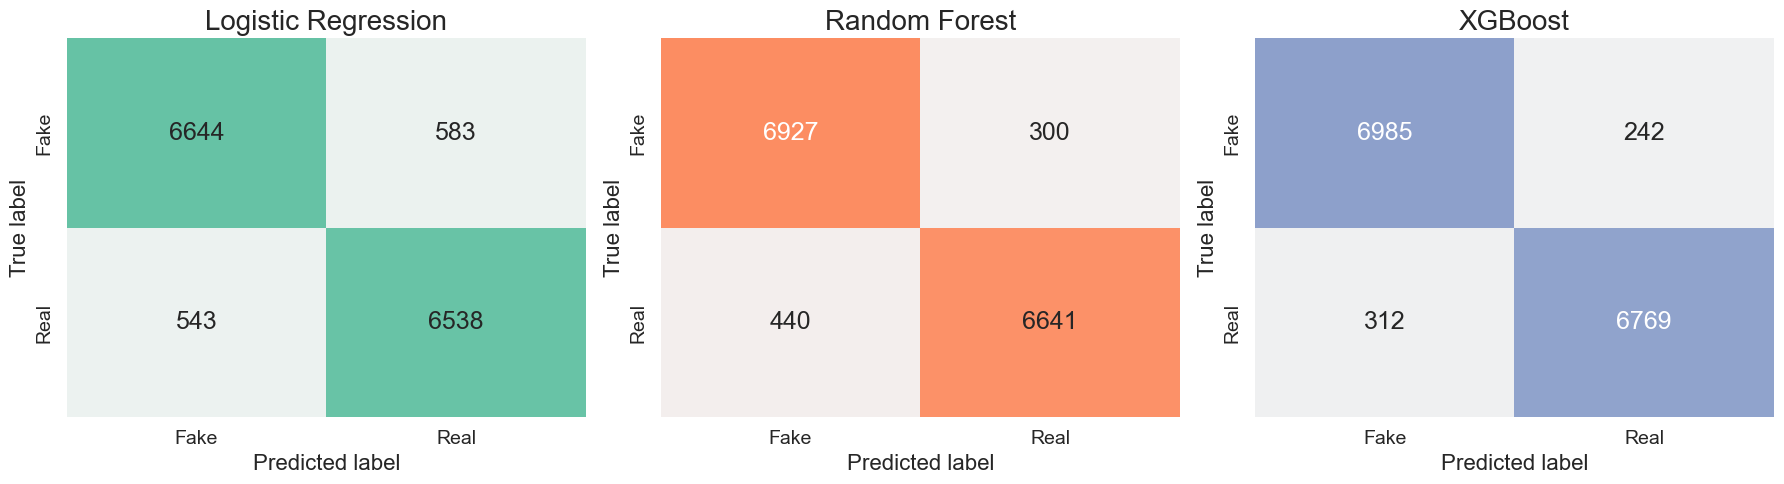

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# 1) Remove grids
sns.set_style("white")

# 2) Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf     = rf.predict(X_test.toarray())
y_pred_xgb    = xgb.predict(X_test.toarray())

# 3) Build confusion matrices
cms = [
    ("Logistic Regression", confusion_matrix(y_test, y_pred_logreg)),
    ("Random Forest",       confusion_matrix(y_test, y_pred_rf)),
    ("XGBoost",             confusion_matrix(y_test, y_pred_xgb)),
]

# 4) Grab Set2 palette and build light colormaps
base_colors = sns.color_palette("Set2", 3)  
cmaps = [sns.light_palette(col, as_cmap=True) for col in base_colors]

# 5) Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, cm), cmap in zip(axes, cms, cmaps):
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=cmap,
        ax=ax,
        xticklabels=["Fake", "Real"],
        yticklabels=["Fake", "Real"],
        cbar=False,
        annot_kws={"size": 18}            # annotation font size
    )
    ax.set_title(title, fontsize=20)     # title font size
    ax.set_xlabel("Predicted label", fontsize=16)
    ax.set_ylabel("True label", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)  # tick label size
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

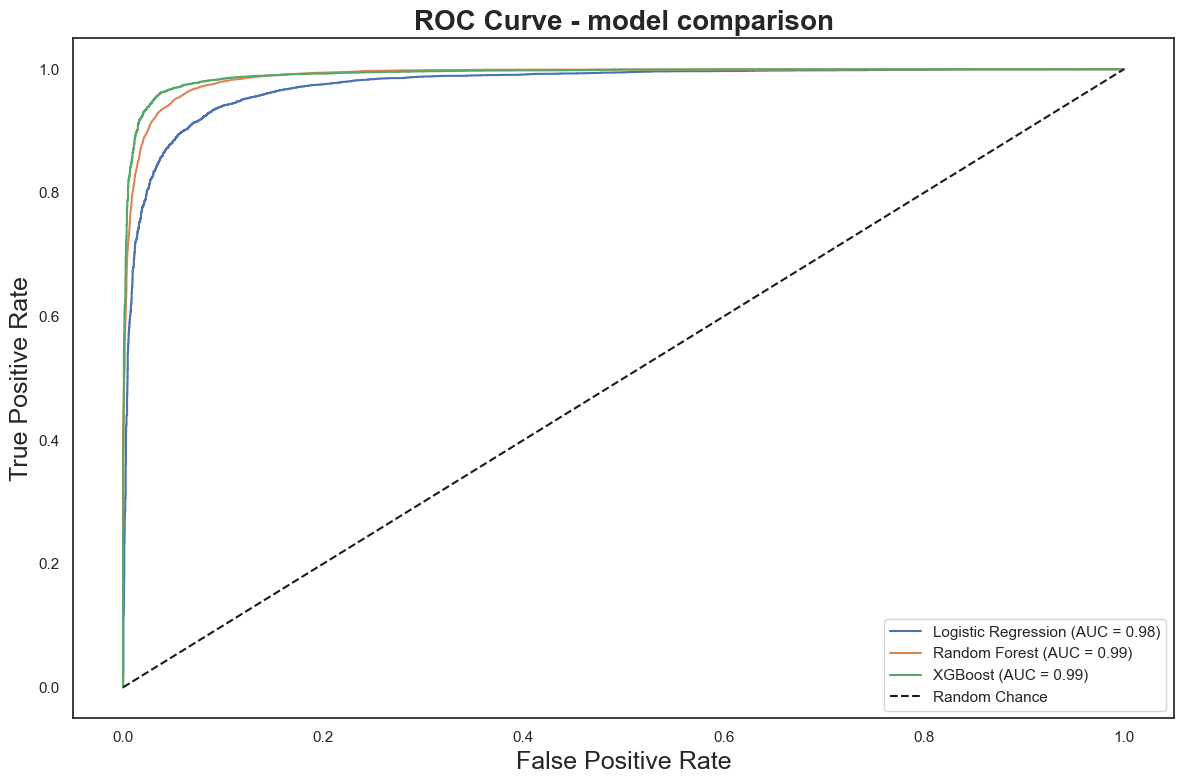

In [34]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# Get predicted probabilities
logreg_probs = logreg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test.toarray())[:, 1]
xgb_probs = xgb.predict_proba(X_test.toarray())[:, 1]

# Compute ROC curves and AUC scores
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Formatting
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve - model comparison', fontsize=20, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.savefig('roc_curve_comparison.svg', format='svg', bbox_inches='tight')
plt.show()

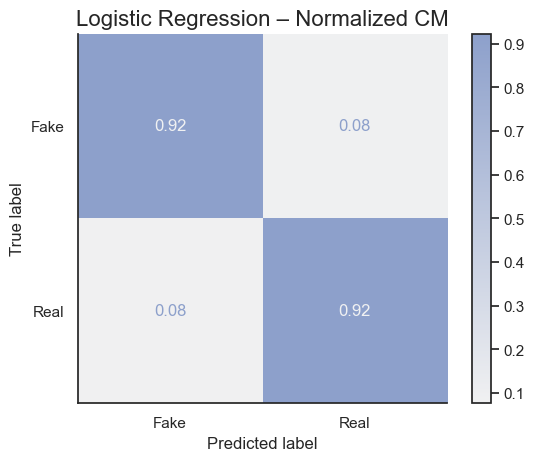

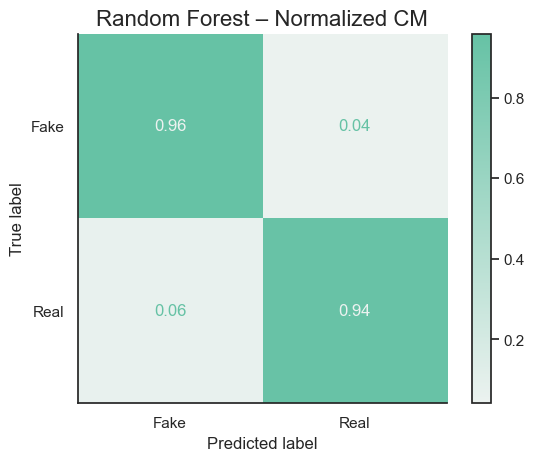

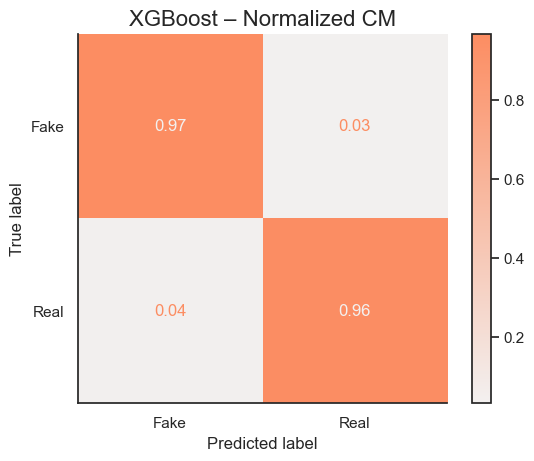

In [35]:
# 1) Pick three soft colors from Set2
palette = sns.color_palette("Set2", 3)
# Order: [Logistic (blue-toned), Random Forest (green-toned), XGBoost (orange-toned)]
cmaps = [
    sns.light_palette(palette[2], as_cmap=True),  # soft blue
    sns.light_palette(palette[0], as_cmap=True),  # soft green
    sns.light_palette(palette[1], as_cmap=True),  # soft orange
]

# 2) Logistic Regression ‚Äì Normalized
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg, normalize="true")
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(cm_logreg, display_labels=["Fake", "Real"])
disp.plot(cmap=cmaps[0], values_format=".2f", ax=ax)
ax.set_title("Logistic Regression ‚Äì Normalized CM", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# 3) Random Forest ‚Äì Normalized
y_pred_rf = rf.predict(X_test.toarray())
cm_rf = confusion_matrix(y_test, y_pred_rf, normalize="true")
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(cm_rf, display_labels=["Fake", "Real"])
disp.plot(cmap=cmaps[1], values_format=".2f", ax=ax)
ax.set_title("Random Forest ‚Äì Normalized CM", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# 4) XGBoost ‚Äì Normalized
y_pred_xgb = xgb.predict(X_test.toarray())
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=["Fake", "Real"])
disp.plot(cmap=cmaps[2], values_format=".2f", ax=ax)
ax.set_title("XGBoost ‚Äì Normalized CM", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()


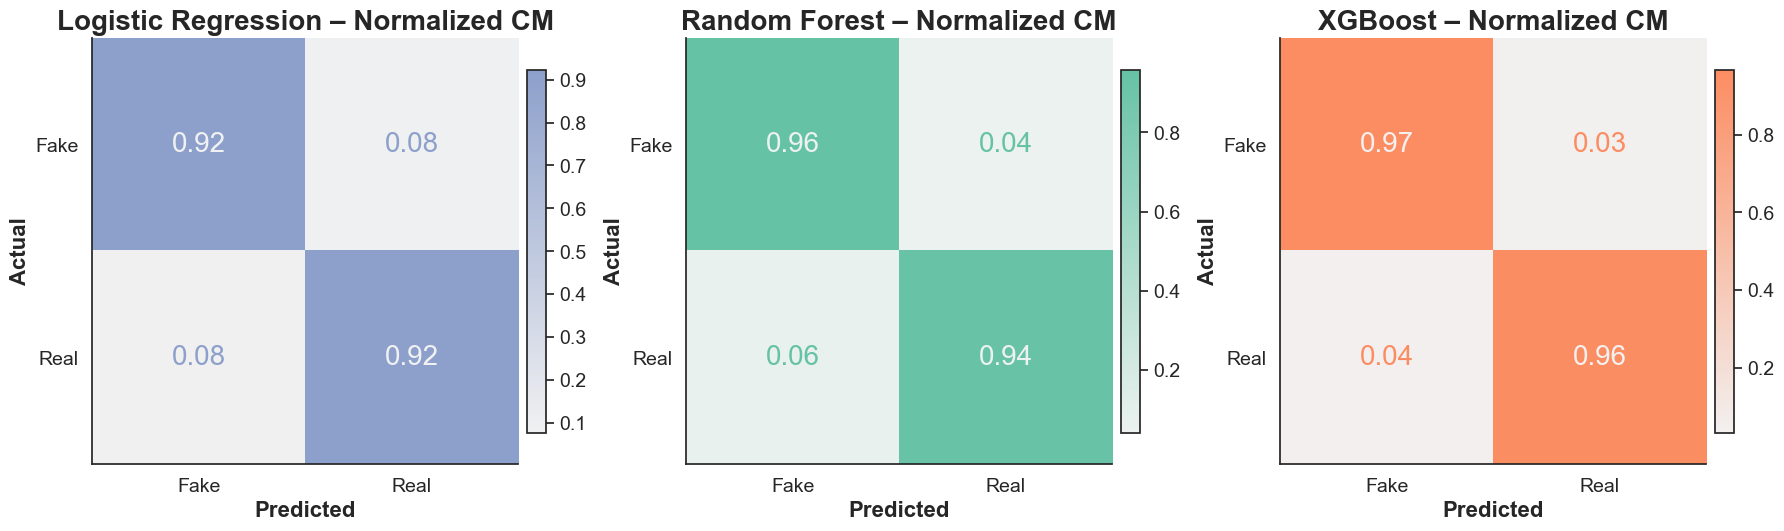

In [36]:
# Combined side-by-side plot with shorter colorbars
titles   = [
    "Logistic Regression ‚Äì Normalized CM",
    "Random Forest ‚Äì Normalized CM",
    "XGBoost ‚Äì Normalized CM"
]
cms_list = [cm_logreg, cm_rf, cm_xgb]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))
for ax, cm, cmap, title in zip(axes, cms_list, cmaps, titles):
    disp = ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"])
    # turn off the built-in colorbar‚Ä¶
    disp.plot(
        cmap=cmap,
        values_format=".2f",
        ax=ax,
        colorbar=False
    )
    # ‚Ä¶and add a custom, shorter one
    cbar = ax.figure.colorbar(disp.im_, ax=ax, fraction=0.04, pad=0.02)
    cbar.ax.tick_params(labelsize=14)
    
    # enlarge text
    for txt in ax.texts:
        txt.set_fontsize(20)
    ax.set_title(title,       fontsize=20,fontweight='bold')
    ax.set_xlabel("Predicted", fontsize=16, fontweight='bold')
    ax.set_ylabel("Actual",    fontsize=16 ,fontweight='bold')
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("confusion_matrices.svg",format='svg', bbox_inches='tight')
plt.show()


## Feature Importance



> Feature importance analysis plays a critical role in enhancing transparency, refining model performance, and uncovering the key linguistic patterns that distinguish fake from real news. It helps demystify black-box predictions and provides interpretable insights into what drives misinformation detection.


In [37]:
# Get TF-IDF feature names
tfidf_feature_names = tfidf.get_feature_names_out()

# Combine with numeric feature names
all_feature_names = list(tfidf_feature_names) + features_to_scale

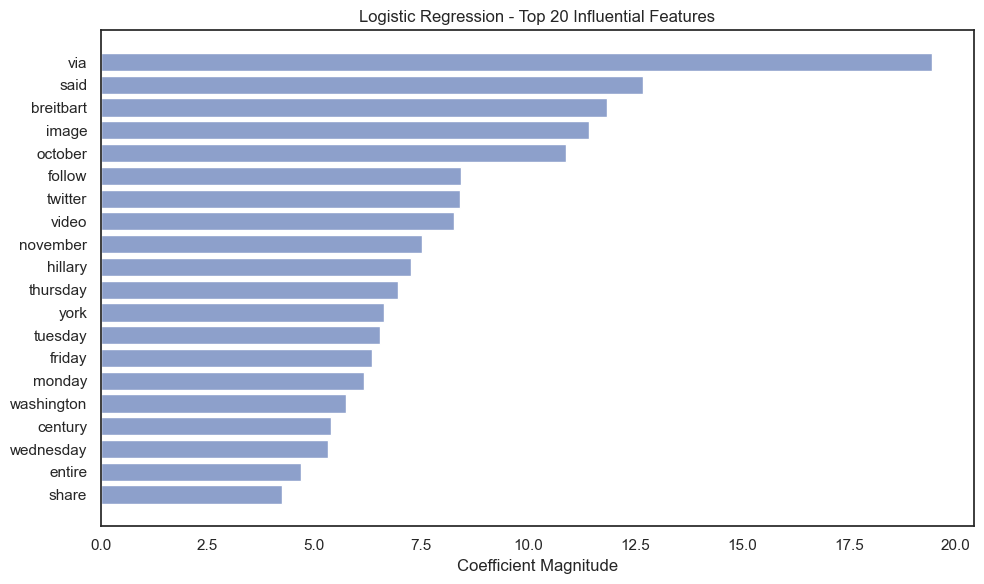

In [38]:
# Get coefficients and absolute values
logreg_coefs = np.abs(logreg.coef_[0])

# Sort top 20
logreg_indices = np.argsort(logreg_coefs)[-20:][::-1]
top_logreg_features = [all_feature_names[i] for i in logreg_indices]
top_logreg_importance = logreg_coefs[logreg_indices]

# Plot
logreg_color = palette[2]  # the blue tone you used for Logistic Regression CM

plt.figure(figsize=(10, 6))
plt.barh(
    top_logreg_features[::-1],
    top_logreg_importance[::-1],
    color=logreg_color
)
plt.xlabel("Coefficient Magnitude")
plt.title("Logistic Regression - Top 20 Influential Features")
plt.tight_layout()
plt.show()

>**Interpretation**: The model relies heavily on surface-level word frequency and position, making it interpretable but potentially limited in capturing nuanced writing style.

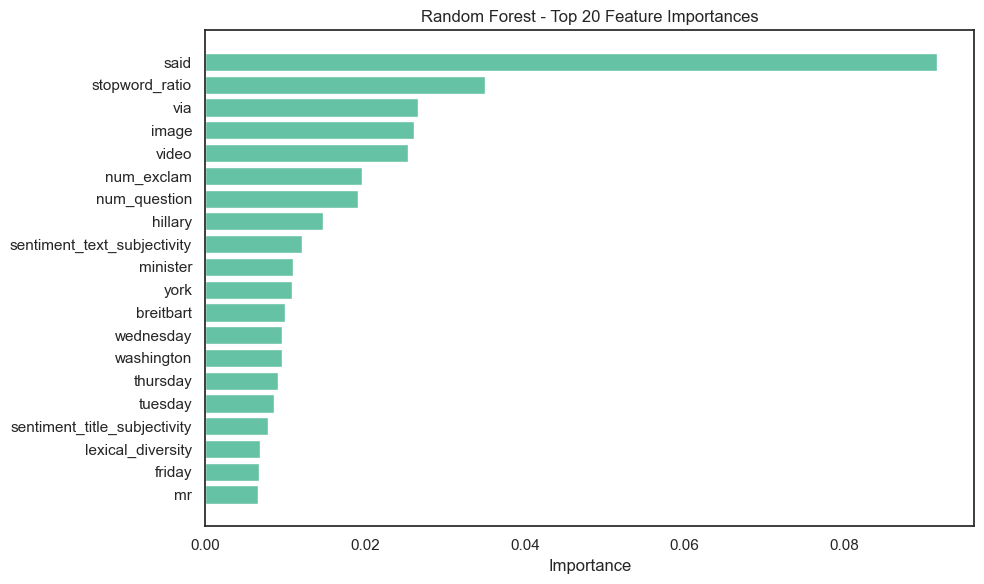

In [39]:
import numpy as np

# Get feature importances
rf_importances = rf.feature_importances_

# Sort top 20 features
rf_indices = np.argsort(rf_importances)[-20:][::-1]
top_rf_features = [all_feature_names[i] for i in rf_indices]
top_rf_importances = rf_importances[rf_indices]

# Plot
rf_color  = palette[0] 
plt.figure(figsize=(10, 6))
plt.barh(
    top_rf_features[::-1],
    top_rf_importances[::-1],
    color=rf_color
)
plt.xlabel("Importance")
plt.title("Random Forest - Top 20 Feature Importances")
plt.tight_layout()
plt.show()


>**Interpretation**: Random Forest balances between keyword detection and writing style, allowing it to capture broader patterns, including tone and structure, without depending solely on word choice.

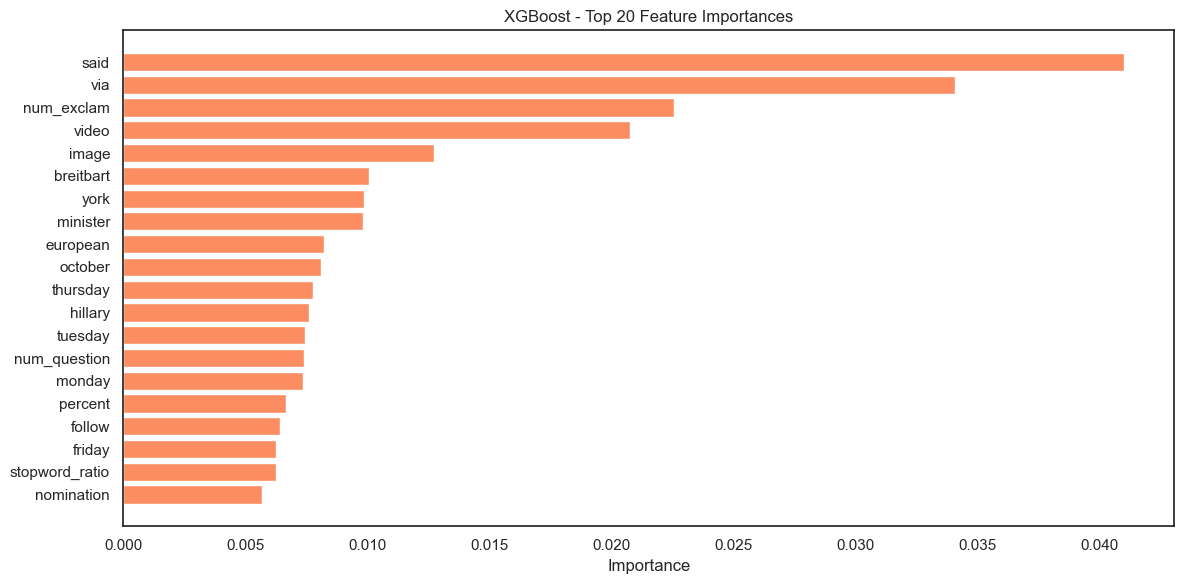

In [40]:
# Get feature importances
xgb_importances = xgb.feature_importances_

# Sort top 20 features
xgb_indices = np.argsort(xgb_importances)[-20:][::-1]
top_xgb_features = [all_feature_names[i] for i in xgb_indices]
top_xgb_importances = xgb_importances[xgb_indices]

# Plot
xgb_color = palette[1]  # the orange tone you used for XGBoost CM
plt.figure(figsize=(12, 6))
plt.barh(
    top_xgb_features[::-1],
    top_xgb_importances[::-1],
    color=xgb_color
)
plt.xlabel("Importance")
plt.title("XGBoost - Top 20 Feature Importances")
plt.tight_layout()
plt.savefig("xgboost_top_features.svg",format='svg', bbox_inches='tight')
plt.show()

>**Interpretation**: XGBoost captures complex interactions between lexical and structural features, making it the most context-aware model among the three. Its ability to use both shallow and deep signals explains its superior predictive accuracy.

>**Overall Interpretation**: Across all three models,Recurrent keywords like "said", "via", and "image" are strong markers of news format or sourcing‚Äîoften manipulated in misinformation.Linguistic features such as stopword_ratio, num_exclam, and subjectivity distinguish stylistic differences between fake and real news.
XGBoost and Random Forest outperform Logistic Regression by effectively integrating both token-level semantics and higher-order writing traits, making them more robust for detecting fake news that mimics real content.
Conclusion: While Logistic Regression highlights interpretable word patterns, ensemble methods like Random Forest and XGBoost go further by modeling the tone, structure, and rhetorical devices of fake news‚Äîcritical for real-world detection systems.

In [41]:
all_feature_names = list(tfidf_feature_names) + features_to_scale

In [42]:
numeric_start_index = len(tfidf_feature_names)

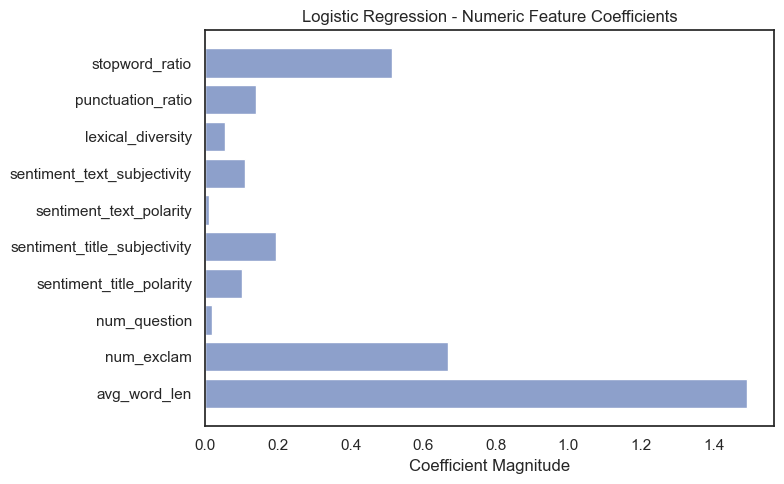

In [43]:
logreg_numeric_coefs = np.abs(logreg.coef_[0][numeric_start_index:])

plt.figure(figsize=(8, 5))
plt.barh(features_to_scale, logreg_numeric_coefs, color=logreg_color)
plt.xlabel("Coefficient Magnitude")
plt.title("Logistic Regression - Numeric Feature Coefficients")
plt.tight_layout()
plt.show()

>**Interpretaion**:Logistic Regression heavily relies on a few distinct features. Its top weights show a clear linguistic separation, but it may miss feature interactions due to its linear nature.

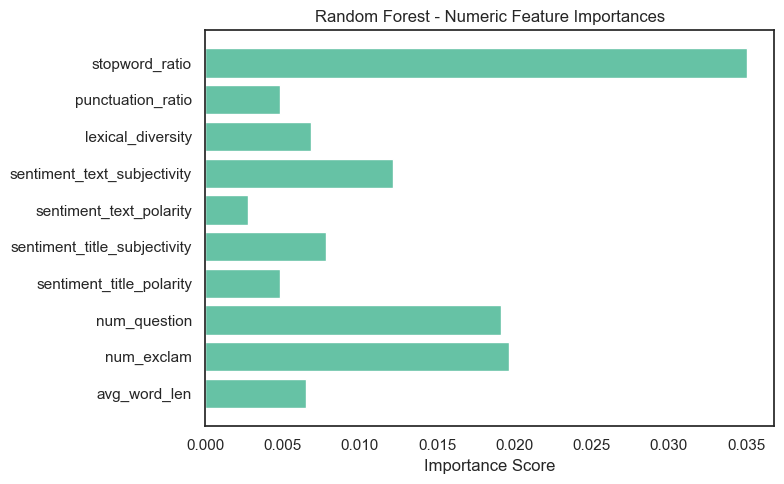

In [44]:
# Get numeric feature importances only
rf_numeric_importances = rf.feature_importances_[numeric_start_index:]
numeric_features_rf = features_to_scale

# Plot
plt.figure(figsize=(8, 5))
plt.barh(numeric_features_rf, rf_numeric_importances, color=rf_color)
plt.xlabel("Importance Score")
plt.title("Random Forest - Numeric Feature Importances")
plt.tight_layout()
plt.show()

>**Interpretation**: Random Forest takes advantage of many stylistic cues, balancing emotional tone (subjectivity), expressive punctuation, and vocabulary usage. It handles diverse feature types well.

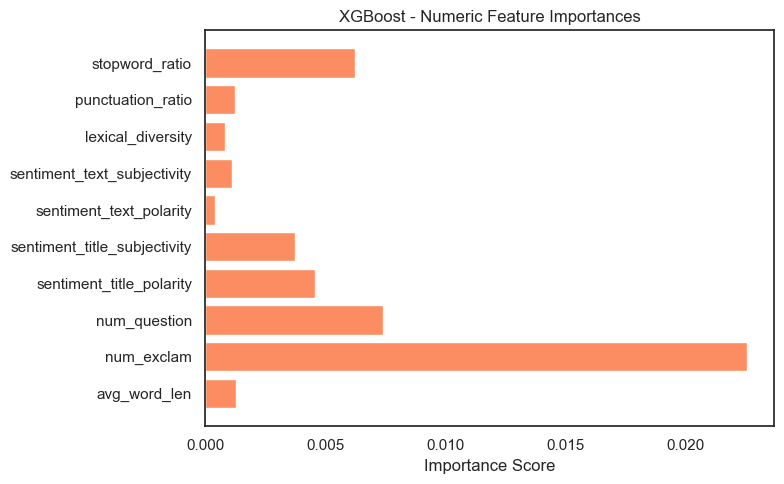

In [45]:
xgb_numeric_importances = xgb.feature_importances_[numeric_start_index:]

plt.figure(figsize=(8, 5))
plt.barh(features_to_scale, xgb_numeric_importances, color=xgb_color)
plt.xlabel("Importance Score")
plt.title("XGBoost - Numeric Feature Importances")
plt.tight_layout()
plt.show()

>**Interpretation**:XGBoost captures non-linear interactions between expressive writing traits, with a strong bias toward features that reflect emotional intensity and exaggeration, making it highly effective in spotting manipulative fake news.

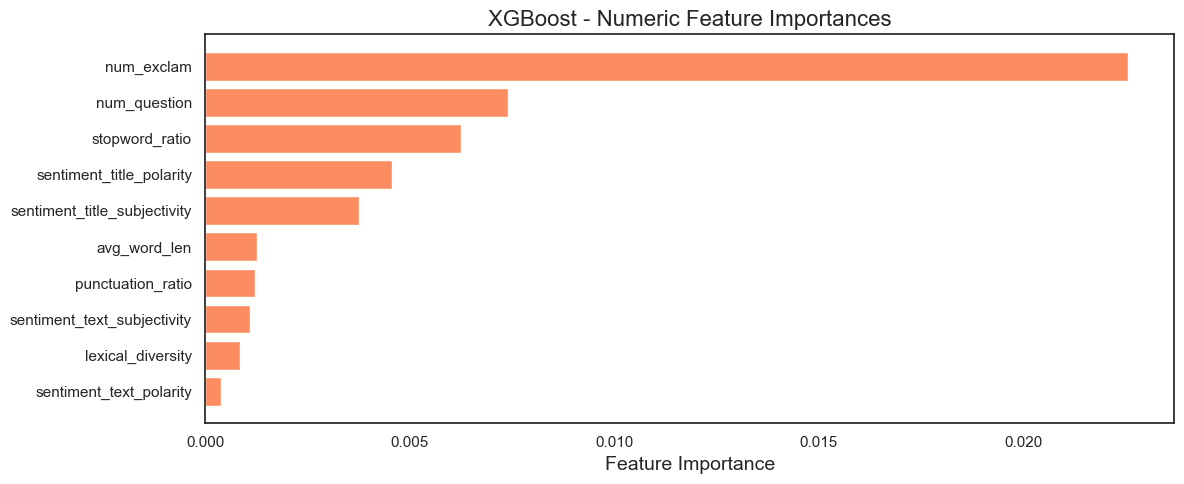

In [46]:
xgb_numeric_importances = xgb.feature_importances_[numeric_start_index:]

# 2) Sort descending
order = np.argsort(xgb_numeric_importances)[::-1]
features_ordered    = np.array(features_to_scale)[order]
importances_ordered = xgb_numeric_importances[order]

# 3) Plot
plt.figure(figsize=(12, 5))
plt.barh(
    features_ordered,
    importances_ordered,
    color=xgb_color
)
plt.xlabel("Feature Importance", fontsize=14)
plt.title("XGBoost - Numeric Feature Importances", fontsize=16)
plt.gca().invert_yaxis()  # highest importance on top
plt.tight_layout()
plt.savefig("xgb_numeric_importances.svg", format='svg', bbox_inches='tight')
plt.show()

#### Conclusion: 

While all models confirm the relevance of stylometric features, XGBoost excels by emphasizing emotional and rhetorical writing styles‚Äîkey indicators of fake news. Random Forest captures a broader range of stylistic nuance, and Logistic Regression serves as a simple but transparent baseline.